In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from google.colab import drive # 마운팅
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import time
import random
import datetime
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.optimizers import Nadam

# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# How to check if Keras is using GPU?


train = pd.read_csv('./My Drive/train.csv')
test  = pd.read_csv('./My Drive/test.csv')
submission = pd.read_csv('./My Drive/submission.csv')

In [ ]:
train

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,1,2,1,3,3,4,4,3,4,1,0,4,4,4,1,1,1,2,3,4,1,2,3,3,2,3,1,3,4,0,...,2,4,1,1,1,1,2,3,1,2,0,2,4,1,0,3,4,4,0,1,3,3,3,3,2,0,3,3,3,2,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,1,4,2,0,3,3,2,2,1,2,3,2,2,4,1,0,4,1,0,2,0,3,0,2,3,3,3,4,0,4,...,0,1,1,1,1,3,0,4,2,0,4,3,1,4,0,1,0,0,3,3,0,0,1,3,3,1,2,0,3,2,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,4,3,4,0,1,3,4,1,0,2,2,0,0,3,3,2,0,4,3,2,3,4,3,1,1,4,4,4,1,1,...,3,2,4,3,2,1,1,0,4,0,4,4,1,3,3,1,3,4,1,0,2,4,1,2,4,4,4,3,4,2,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,3,0,1,4,0,0,0,2,3,1,1,1,0,2,4,1,0,3,0,1,2,4,1,4,3,1,4,4,4,0,...,0,0,2,0,2,3,2,0,3,0,1,0,1,0,1,2,3,2,1,1,0,0,3,1,4,1,1,2,1,3,2,3,1,1,0,4,1,4,3,1


In [ ]:
X_train = (train[[str(i) for i in range(784)]] / 255.).values.reshape(-1,28,28,1) # namalization 0~1의 값
y_train = to_categorical(train['digit'].values) # one-hot encoding

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_letter = train.iloc[:,2].values # 알파벳 아스키코드로 변환
for idx in range(len(X_letter)):
    X_letter[idx] = ord(X_letter[idx]) #ord() 안에 문자값을 넣어 주면 아스키코드로 변환 ex) Z = 90
X_letterToNum = X_letter

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (
    Conv2D,Conv1D, BatchNormalization, Dropout, MaxPool2D, Activation,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add, AveragePooling2D,GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras import regularizers
import numpy as np
import argparse
import locale
import os

In [ ]:
dim = 7 # 이진화 한 수가 들어갈 차원 정의

In [ ]:
inputs1 = Input((7,1))

mlp = Dense(16, activation='relu', kernel_initializer='he_normal' ,bias_regularizer=regularizers.l2(l=0.1))(inputs1)
mlp = Dense(8, activation='relu', kernel_initializer='he_normal',bias_regularizer=regularizers.l2(l=0.1))(mlp)
mlp = Dense(4, activation='relu', kernel_initializer='he_normal',bias_regularizer=regularizers.l2(l=0.1))(mlp)
mlp = Flatten()(mlp)

mlp = Model(inputs1, mlp) # chain layer call

In [ ]:
from keras import layers

In [ ]:
 # Remove the previous model.(resnet모델을 본따서 만든 것)
model = None
    
# Input layer
img_input = layers.Input(shape = (28,28,1)) # 이미지 형태

# CNN
# Identity mapping shortcut을 위한 conv_1 layer
conv_1 = layers.Conv2D(128, kernel_size = 3, padding = 'same', kernel_initializer='he_normal',activation = 'relu')(img_input) # 입력 이미지와 출력 이미지 같게 padding = same

conv_2_1 = layers.Conv2D(128, kernel_size = 3, padding = 'same', kernel_initializer='he_normal',activation = 'relu')(conv_1)
conv_2_1 = layers.Conv2D(128, kernel_size = 3, padding = 'same', kernel_initializer='he_normal')(conv_2_1)


# ShortCut connection
add_2_1 = layers.add([conv_1, conv_2_1])
add_2_1 = BatchNormalization()(add_2_1)
out_2_1 = layers.Activation('relu')(add_2_1)

conv_2_2 = layers.Conv2D(128, kernel_size = 3, padding = 'same',kernel_initializer='he_normal', activation = 'relu')(out_2_1) # 다시 층 쌓기
conv_2_2 = layers.Conv2D(128, kernel_size = 3, padding = 'same',kernel_initializer='he_normal')(conv_2_2)

# ShortCut connection
add_2_2 = layers.add([out_2_1, conv_2_2])
add_2_2= BatchNormalization()(add_2_2) # batchnomalization
out_2_2 = layers.Activation('relu')(add_2_1)

pool_2 = layers.MaxPool2D((2,2), strides = 2)(out_2_2) 

conv_3_0 = layers.Conv2D(256, kernel_size = 1, strides = 1, kernel_initializer='he_normal')(pool_2)

conv_3_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu',kernel_initializer='he_normal')(conv_3_0)
conv_3_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same',kernel_initializer='he_normal')(conv_3_1)

# ShortCut connection
add_3_1 = layers.add([conv_3_0, conv_3_1])
add_3_1= BatchNormalization()(add_3_1)

out_3_1 = layers.Activation('relu')(add_3_1)

conv_3_2 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu',kernel_initializer='he_normal')(out_3_1)
conv_3_2 = layers.Conv2D(256, kernel_size = 3, padding = 'same',kernel_initializer='he_normal')(conv_3_2)

# ShortCut connection
add_3_2 = layers.add([out_3_1, conv_3_2])
add_3_2= BatchNormalization()(add_3_2)

out_3_2 = layers.Activation('relu')(add_3_2)

pool_3 = layers.MaxPool2D((2,2), strides = 2)(out_3_2)

conv_4_0 = layers.Conv2D(256, kernel_size = 1, strides = 1)(pool_3)

conv_4_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu',kernel_initializer='he_normal')(conv_4_0)
conv_4_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same',kernel_initializer='he_normal')(conv_4_1)




# ShortCut connection
add_4_1 = layers.add([conv_4_0, conv_4_1])
add_4_1= BatchNormalization()(add_4_1)

out_4_1 = layers.Activation('relu')(add_4_1)

pool_4 = layers.MaxPool2D((2,2), strides = 2)(out_4_1)

conv_5_0 = layers.Conv2D(256, kernel_size = 1, strides = 1)(pool_4)

conv_4_2 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu',kernel_initializer='he_normal')(conv_5_0)
conv_4_2 = layers.Conv2D(256, kernel_size = 3, padding = 'same',kernel_initializer='he_normal')(conv_4_1)

# ShortCut connection
add_4_2 = layers.add([out_4_1, conv_4_2])
add_4_2= BatchNormalization()(add_4_2)

out_4_2 = layers.Activation('relu')(add_4_2)

pool_5 = layers.MaxPool2D((2,2), strides = 2)(out_4_2)

conv_5_0 = layers.Conv2D(256, kernel_size = 1, strides = 1)(pool_4)

conv_5_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu',kernel_initializer='he_normal')(conv_5_0)
conv_5_1 = layers.Conv2D(256, kernel_size = 3, padding = 'same',kernel_initializer='he_normal')(conv_5_1)





# ShortCut connection
add_5_1 = layers.add([conv_5_0, conv_5_1])
add_5_1= BatchNormalization()(add_5_1)

out_5_1 = layers.Activation('relu')(add_5_1)

pool_5 = layers.MaxPool2D((2,2), strides = 2)(out_5_1)


# FC layers
img_features = layers.Flatten()(pool_5)
img_features = layers.Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(l=0.1))(img_features)
img_features = layers.Dropout(rate = 0.4)(img_features)
img_features = layers.Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(l=0.1))(img_features)   
img_features = layers.Dropout(rate = 0.4)(img_features)
    
x = Model(img_input, img_features)

In [ ]:
combinedInput = concatenate([mlp.output, x.output]) # 합치기(새로운 input) 알파벳 예측, 숫자예측

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
y = Dense(10, activation="softmax")(combinedInput)


In [ ]:
final_model = Model(inputs=[mlp.input, x.input], outputs=y)

In [ ]:
final_model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
X_letterToNum = np.asarray(X_letterToNum).astype(np.float32) # 이미지 처리를 위해 float32로 변경.
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
datagen = ImageDataGenerator(width_shift_range=5, # 예를 들어 전체 넓이가 100이라면 20픽셀 내외로 움직임
                                 height_shift_range=5, #수직방향으로 20픽셀 내외
                                 rotation_range=90, #0~90도 사이 임의로
                                 zoom_range=0.05) #  “1-수치”부터 “1+수치”0.95~1.05사이의 확대.

#두번의 이미지 증강
flow1 = datagen.flow(X_train, X_letterToNum, batch_size=32, seed=1218) # 이미지와 알파벳에 따른 이미지 증강
flow2 = datagen.flow(X_train, y_train, batch_size=32, seed=1218) # 이미지와 숨어있는 숫자 값에 따른 이미지 증강

In [ ]:
i = 0
while i < 1500:
    X_image_gen1,X_letter_gen=flow1.next()
    X_image_gen2,y_gen=flow2.next()

    X_image_gen1 = np.asarray(X_image_gen1).astype(np.float32)
    X_letter_gen = np.asarray(X_letter_gen).astype(np.float32)
    y_gen = np.asarray(y_gen).astype(np.float32)
    
    X_train = np.r_[X_train, X_image_gen1] # 데이터를 옆으로 붙이기
    X_letterToNum = np.r_[X_letterToNum, X_letter_gen] # 같다
    y_train = np.r_[y_train,y_gen] # 같다
    
    i += 1
    '''
    print("X_train.shape={}".format(X_train.shape))
    print("X_letterToNum.shape={}".format(X_letterToNum.shape))
    print("y_train.shape={}".format(y_train.shape))
    print('\n')
    '''

## letter data 를 이진화 해보자.

In [ ]:
X_letterToNum = X_letterToNum.astype(np.int) # 정수형으로 변환

In [ ]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_letterToBi = []
for i in range(len(X_letterToNum)):
    tmp = X_letterToNum[i]
    bi = np.zeros(7)
    k = 6
    while tmp > 0 and k >= 0:
        if tmp >= pow(2, k):
            bi[6-k] = 1
            tmp -= pow(2, k)
        k -= 1
    X_letterToBi.append(bi)

In [ ]:
X_letterToBi[0:5] # 마지막 알파벳인 Z의 아스키코드 90.이것을 이진화 하고싶다. [7개의 숫자] 2의 7제곱의 경우의 수 = 128 / 표현 가능. 

[array([1., 0., 0., 1., 1., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 1., 1., 0., 0.]),
 array([1., 0., 0., 0., 1., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 1.])]

In [ ]:
X_letterToBi = np.asarray(X_letterToBi).astype(np.float32)

In [ ]:
X_train.shape

(98048, 28, 28, 1)

In [ ]:
X_letterToBi.shape

(98048, 7)

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
epochs = 20

In [ ]:
history = final_model.fit(
    x=[X_letterToBi, X_train], y=y_train,
    validation_split=0.1,
    epochs=epochs, 
    callbacks=[annealer],
    steps_per_epoch=X_train
    .shape[0]//32,
    shuffle=True
)

Epoch 1/20
3064/3064 [==============================] - 42s 14ms/step - loss: 1.6097 - accuracy: 0.4780 - val_loss: 1.8894 - val_accuracy: 0.3933
Epoch 2/20
3064/3064 [==============================] - 42s 14ms/step - loss: 1.4878 - accuracy: 0.5276 - val_loss: 1.7203 - val_accuracy: 0.4498
Epoch 3/20
3064/3064 [==============================] - 41s 14ms/step - loss: 1.3505 - accuracy: 0.5901 - val_loss: 1.7272 - val_accuracy: 0.4592
Epoch 4/20
3064/3064 [==============================] - 41s 13ms/step - loss: 1.2240 - accuracy: 0.6410 - val_loss: 1.5955 - val_accuracy: 0.5116
Epoch 5/20
3064/3064 [==============================] - 41s 13ms/step - loss: 1.1116 - accuracy: 0.6818 - val_loss: 1.5571 - val_accuracy: 0.5357
Epoch 6/20
3064/3064 [==============================] - 41s 13ms/step - loss: 1.0092 - accuracy: 0.7150 - val_loss: 1.5630 - val_accuracy: 0.5406
Epoch 7/20
3064/3064 [==============================] - 41s 13ms/step - loss: 0.9220 - accuracy: 0.7440 - val_loss: 1.6115 -

KeyboardInterrupt: ignored

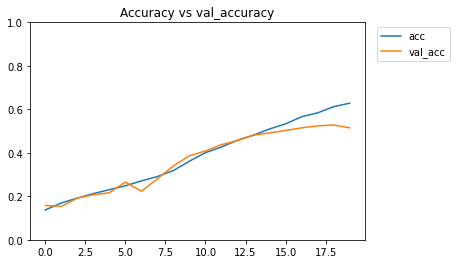

In [ ]:
plt.figure()

epoch = np.arange(epochs)

plt.plot(epoch, np.asarray(history.history['accuracy']),label="acc")
plt.plot(epoch, np.asarray(history.history['val_accuracy']),label="val_acc")

plt.title('Accuracy vs val_accuracy')
plt.ylim(0,1)

plt.legend(bbox_to_anchor=(1.02,1),loc=2)

In [ ]:
test.head()

In [ ]:
test.iloc[:,1].values[1]

In [ ]:
X_test_letter = test.iloc[:,1].values

In [ ]:
for idx in range(len(X_test_letter)):
    X_test_letter[idx] = ord(X_test_letter[idx])
X_letterToNum_test = X_test_letter.astype(np.int)

In [ ]:
X_letterToBi_test = []
for i in range(len(X_letterToNum_test)):
    tmp = X_letterToNum_test[i]
    bi = np.zeros(7)
    k = 6
    while tmp > 0 and k >= 0:
        if tmp >= pow(2, k):
            bi[6-k] = 1
            tmp -= pow(2, k)
        k -= 1
    X_letterToBi_test.append(bi)

In [ ]:
X_letterToBi_test = np.asarray(X_letterToBi_test).astype(np.float32)

# Pytorch

In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models

from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv('./My Drive/train.csv', usecols = lambda column : column not in ["id" , "letter"])
test_df = pd.read_csv('./My Drive/test.csv',usecols = lambda column : column not in ["id" , "letter"])
submission = pd.read_csv('./My Drive/submission.csv')

In [ ]:
# have a glimpse of train dataframe structure
n_train = len(train_df)
n_pixels = len(train_df.columns) - 1
n_class = len(set(train_df['digit']))
print('Number of training samples: {0}'.format(n_train))
print('Number of training pixels: {0}'.format(n_pixels))
print('Number of classes: {0}'.format(n_class))
print(train_df.head())

# have a glimpse of test dataframe structure
n_test = len(test_df)
n_pixels = len(test_df.columns)
print('Number of test samples: {0}'.format(n_test))
print('Number of test pixels: {0}'.format(n_pixels))
print(test_df.head())

Number of training samples: 2048
Number of training pixels: 784
Number of classes: 10
   digit  0  1  2  3  4  5  6  7  ...  775  776  777  778  779  780  781  782  783
0      5  1  1  1  4  3  0  0  4  ...    1    0    1    2    4    4    4    3    4
1      0  0  4  0  0  4  1  1  1  ...    3    0    1    4    1    4    2    1    2
2      4  1  1  2  2  1  1  1  0  ...    3    3    0    2    0    3    0    2    2
3      9  1  2  0  2  0  4  0  3  ...    3    2    0    1    4    0    0    1    1
4      6  3  0  2  4  0  3  0  4  ...    4    3    2    1    3    4    3    1    2

[5 rows x 785 columns]
Number of test samples: 20480
Number of test pixels: 784
   0  1  2  3  4  5  6  7  8  ...  775  776  777  778  779  780  781  782  783
0  0  4  0  2  4  2  3  1  0  ...    0    4    2    2    4    3    4    1    4
1  4  1  4  0  1  1  0  2  2  ...    3    2    4    2    4    2    2    1    2
2  0  4  0  1  3  2  3  0  2  ...    3    2    0    3    2    3    0    1    4
3  2  1  3  3  3  4

1, 5, 2, 4, 1, 4, 7, 3


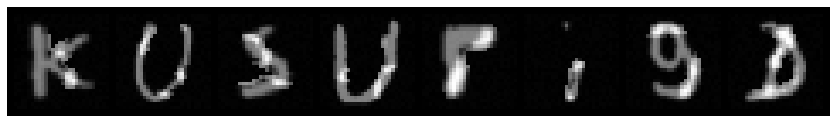

In [ ]:
random_sel = np.random.randint(n_train, size=8)

grid = make_grid(torch.Tensor((train_df.iloc[random_sel, 1:].values/255.).reshape((-1, 28, 28))).unsqueeze(1), nrow=8)
plt.rcParams['figure.figsize'] = (16, 2)
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis('off')
print(*list(train_df.iloc[random_sel, 0].values), sep = ', ')

In [ ]:
class MNISTDataset(Dataset):
    """MNIST dtaa set"""
    
    def __init__(self, dataframe, 
                 transform = transforms.Compose([transforms.ToPILImage(),
                                                 transforms.ToTensor(),
                                                 transforms.Normalize(mean=(0.5,), std=(0.5,))])
                ):
        df = dataframe
        # for MNIST dataset n_pixels should be 784
        self.n_pixels = 784
        
        if len(df.columns) == self.n_pixels:
            # test data
            self.X = df.values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
            self.y = None
        else:
            # training data
            self.X = df.iloc[:,1:].values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
            self.y = torch.from_numpy(df.iloc[:,0].values)
            
        self.transform = transform
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.transform(self.X[idx]), self.y[idx]
        else:
            return self.transform(self.X[idx])

In [ ]:
RandAffine = transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))

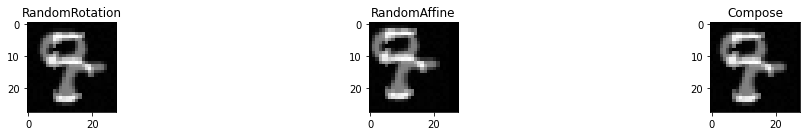

In [ ]:
rotate = transforms.RandomRotation(degrees=0)
shift = RandAffine
composed = transforms.Compose([rotate,
                               shift])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = transforms.ToPILImage()(train_df.iloc[65,1:].values.reshape((28,28)).astype(np.uint8)[:,:,None])
for i, tsfrm in enumerate([rotate, shift, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    ax.imshow(np.reshape(np.array(list(transformed_sample.getdata())), (-1,28)), cmap='gray')    

plt.show()

In [ ]:
batch_size = 64

train_transforms = transforms.Compose(
    [transforms.ToPILImage(),
     RandAffine,
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5,), std=(0.5,))])

val_test_transforms = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5,), std=(0.5,))])

def get_dataset(dataframe, dataset=MNISTDataset,
                transform=transforms.Compose([transforms.ToPILImage(),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean=(0.5,), std=(0.5,))])):
    return dataset(dataframe, transform=transform)

In [ ]:
resnet18 = models.resnet18()

In [ ]:
from torchvision.models.resnet import ResNet, BasicBlock, Bottleneck

class MNISTResNet(ResNet):
    def __init__(self):
        super(MNISTResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10) # Based on ResNet18
        #super(MNISTResNet, self).__init__(BasicBlock, [3, 4, 6, 3], num_classes=10) # Based on ResNet34
        #super(MNISTResNet, self).__init__(Bottleneck, [3, 4, 6, 3], num_classes=10) # Based on ResNet50
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3,bias=False)

model = MNISTResNet()
print(model)

MNISTResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tru

In [ ]:
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader): 
        # if GPU available, move data and target to GPU
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        # compute output and loss
        output = model(data)
        loss = criterion(output, target)
        
        # TODO:
        # 1. add batch metric (acc1, acc5)
        # 2. add average metric top1=sum(acc1)/batch_idx, top5 = sum(acc5)/batch_idx
        
        # backward and update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    print('Train Epoch: {} , Accuracy: {}/{} ({:.3f}%)'.format(
        epoch ,correct, len(train_loader.dataset),100.0 * float(correct) / len(train_loader.dataset)))

In [ ]:
def validate(val_loader, model, criterion):
    model.eval()
    loss = 0
    correct = 0
    
    for _, (data, target) in enumerate(val_loader):
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)
        
        loss += criterion(output, target).data.item()

        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    loss /= len(val_loader.dataset)
        
    print('On Val set Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)'.format(
        loss, correct, len(val_loader.dataset),
        100.0 * float(correct) / len(val_loader.dataset)))

In [ ]:
total_epoches = 1
step_size = 1
base_lr = 1

optimizer = optim.Adam(model.parameters(), lr=base_lr)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
def split_dataframe(dataframe=None, fraction=0.9, rand_seed=1):
    df_1 = dataframe.sample(frac=fraction, random_state=rand_seed)
    df_2 = dataframe.drop(df_1.index)
    return df_1, df_2
for epoch in range(total_epoches):
    print("\nTrain Epoch {}: lr = {}".format(epoch, exp_lr_scheduler.get_lr()[0]))

    train_df_new, val_df = split_dataframe(dataframe=train_df, fraction=0.9, rand_seed=epoch)
    
    train_dataset = get_dataset(train_df_new, transform=train_transforms)
    val_dataset = get_dataset(val_df, transform=val_test_transforms)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                             batch_size=batch_size, shuffle=True)


Train Epoch 0: lr = 1


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


In [ ]:
total_epoches = 30
step_size = 10
base_lr = 0.01

optimizer = optim.Adam(model.parameters(), lr=base_lr)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

for epoch in range(total_epoches):
    print("\nTrain Epoch {}: lr = {}".format(epoch, exp_lr_scheduler.get_lr()[0]))

    train(train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, epoch=epoch)
    validate(val_loader=val_loader, model=model, criterion=criterion)
    exp_lr_scheduler.step()

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)



Train Epoch 0: lr = 0.01
Train Epoch: 0 , Accuracy: 372/1843 (20.184%)
On Val set Average loss: 0.0752, Accuracy: 39/205 (19.024%)

Train Epoch 1: lr = 0.01
Train Epoch: 1 , Accuracy: 697/1843 (37.819%)
On Val set Average loss: 0.0296, Accuracy: 92/205 (44.878%)

Train Epoch 2: lr = 0.01
Train Epoch: 2 , Accuracy: 909/1843 (49.322%)
On Val set Average loss: 0.0376, Accuracy: 95/205 (46.341%)

Train Epoch 3: lr = 0.01
Train Epoch: 3 , Accuracy: 1037/1843 (56.267%)
On Val set Average loss: 0.0224, Accuracy: 124/205 (60.488%)

Train Epoch 4: lr = 0.01
Train Epoch: 4 , Accuracy: 1206/1843 (65.437%)
On Val set Average loss: 0.0236, Accuracy: 128/205 (62.439%)

Train Epoch 5: lr = 0.01
Train Epoch: 5 , Accuracy: 1303/1843 (70.700%)
On Val set Average loss: 0.0363, Accuracy: 122/205 (59.512%)

Train Epoch 6: lr = 0.01
Train Epoch: 6 , Accuracy: 1386/1843 (75.203%)
On Val set Average loss: 0.0185, Accuracy: 149/205 (72.683%)

Train Epoch 7: lr = 0.01
Train Epoch: 7 , Accuracy: 1409/1843 (76.4

In [ ]:
total_epoches = 30
step_size = 10
base_lr = 0.01

optimizer = optim.Adam(model.parameters(), lr=base_lr)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.1)

for epoch in range(total_epoches):
    print("\nTrain Epoch {}: lr = {}".format(epoch, exp_lr_scheduler.get_lr()[0]))

    train_df_new, val_df = split_dataframe(dataframe=train_df, fraction=0.9, rand_seed=epoch)
    
    train_dataset = get_dataset(train_df_new, transform=train_transforms)
    val_dataset = get_dataset(val_df, transform=val_test_transforms)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                             batch_size=batch_size, shuffle=True)

    train(train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, epoch=epoch)
    validate(val_loader=val_loader, model=model, criterion=criterion)
    exp_lr_scheduler.step()

In [ ]:
def prediciton(test_loader, model):
    model.eval()
    test_pred = torch.LongTensor()
    
    for i, data in enumerate(test_loader):
        if torch.cuda.is_available():
            data = data.cuda()
            
        output = model(data)
        
        pred = output.cpu().data
        if i == 0 :
            test_pred = pred
        else :
            test_pred = torch.cat([test_pred,pred], dim=0)
        """
        pred = output.cpu().data.max(1, keepdim=True)[1]
        test_pred = torch.cat((test_pred, pred), dim=0)
        """
        del pred
        
    return test_pred

In [ ]:
test_batch_size = 64
test_dataset = get_dataset(test_df, transform=val_test_transforms)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=test_batch_size, shuffle=False)

# tensor prediction
pred_output = prediciton(test_loader, model)

In [ ]:
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1,28,28,1)

pred_output_keras = final_model.predict([X_letterToBi_test,X_test])


In [ ]:
pred_output[0]

tensor([-1.0031, -0.9606,  1.6719,  0.2488,  0.5495,  0.3143,  4.8859, -2.0453,
         6.3600, -1.4474])

In [ ]:
pred_output_keras[7]

In [ ]:
((pred_output + pred_output_keras) / 2)[7]

In [ ]:
results = np.argmax((pred_output + pred_output_keras) / 2,axis=1) # 가장 큰 값 반환.

In [ ]:
results

In [ ]:
submission.digit = results
submission.to_csv('submission_09-14_앙상블_마지막.csv', index=False)